# Imports

In [1]:
import pandas as pd, numpy as np
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [2]:
from google.colab import drive
drive.mount('/gdrive')
# %cd /gdrive

Mounted at /gdrive


## Read in data

In [3]:
path = '/gdrive/MyDrive/Springboard/7 Data Wrangling/Capstone 2/train.csv'
df = pd.read_csv(path)

In [4]:
# Id is index, drop this

df = df.drop(columns='Id')

- Gonna keep these for now to see if we can make use of later

In [ ]:
# others to drop that just don't make sense after analysis from EDA

# df = df.drop(columns=['MiscFeature', 'MiscVal', 'MoSold', 'YrSold'])

In [ ]:
# extract target

y = df['SalePrice'].copy()

In [ ]:
# Create skeleton for hyperparamter dictionary

hyperdf = pd.DataFrame()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import numpy.random as npr

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# set seed for reproducibility and so we can access the indices

npr.seed(seed=0)

# Define regression function

In [ ]:
# define function which outputs all info we need when testing new hyperparameters

def regress(X, y, Notes='', k=5, model=LinearRegression()):
  '''
  Fits a model on the features "X" and targets "y"
  default is a LinearRegression model

  uses cross validation

  k: number of folds for cross validation
    default is 5

  X and y are pandas DataFrames

  returns a dictionary with relevant hyperparameters and metrics
  '''

  scores = cross_validate(model, X.copy(), y.copy(), cv=k,
    scoring=('neg_root_mean_squared_error', 'neg_mean_absolute_error'),
    return_train_score=True)

  # create hyperparameter dictionary
  hypers = {'Features':X.columns, '# of features':len(X.columns), \
            'Mean Train MAE':np.mean(scores['train_neg_mean_absolute_error']), \
            'Std Train MAE':np.std(scores['train_neg_mean_absolute_error']), \

            'Mean Test MAE':np.mean(scores['test_neg_mean_absolute_error']), \
            'Std Test MAE':np.std(scores['test_neg_mean_absolute_error']), \

            'Mean Train RMSE':np.mean(scores['train_neg_root_mean_squared_error']), \
            'Std Train RMSE':np.std(scores['train_neg_root_mean_squared_error']), \

            'Mean Test RMSE':np.mean(scores['test_neg_root_mean_squared_error']), \
            'Std Test RMSE':np.std(scores['test_neg_root_mean_squared_error']), \

            "Notes":Notes,
            "Folds":k,

            'Train MAE': scores['train_neg_mean_absolute_error'], \
            'Test MAE': scores['test_neg_mean_absolute_error'], \
            'Train RMSE': scores['train_neg_root_mean_squared_error'], \
            'Test RMSE': scores['test_neg_root_mean_squared_error'], \
            'Model Type':model}

  return hypers

## Numerical with Naive handling of NA

- I will extract the numerical/continuous features
  - Analyze the results using the naive approach, i.e. dropping the Garage year built and only filling the NA with 0
  - The smart approach doesn't drop the garage year built but puts 0 for NA and also creates a flag column for each that indicates whether or not NA was present.

In [ ]:
# Numerical features where NAs are present

na_cont = ['GarageYrBlt', 'MasVnrArea', 'LotFrontage']

In [ ]:
# add a column which is a flag for those continuous features
# that have NA values

for i in na_cont:
  df[i+"_isna"] = df[i].isna()*1

In [ ]:
# fill the NA with appropriate values w/in those features now
# we decided that 0 is probably best

df.loc[:, na_cont] = df[na_cont].fillna(0)

In [ ]:
# do cross validation on numerical with simple approach
feats = ['MasVnrArea', 'LotFrontage']
X = df[feats].copy()

In [ ]:
out = regress(X, y, Notes='Numerical features with naive approach')
out

{'Features': Index(['MasVnrArea', 'LotFrontage'], dtype='object'),
 '# of features': 2,
 'Mean Train MAE': -50917.747951370504,
 'Std Train MAE': 718.7670027488771,
 'Mean Test MAE': -51025.58272739347,
 'Std Test MAE': 2417.6208827950677,
 'Mean Train RMSE': -68771.92856289665,
 'Std Train RMSE': 1143.6560299731857,
 'Mean Test RMSE': -68911.34757402368,
 'Std Test RMSE': 4685.402441436475,
 'Notes': 'Numerical features with naive approach',
 'Folds': 5,
 'Train MAE': array([-51374.92005286, -49833.77750448, -50630.65216586, -51965.9253145 ,
        -50783.46471915]),
 'Test MAE': array([-49139.05525895, -54376.19177995, -52518.11407142, -47567.31957995,
        -51527.23294668]),
 'Train RMSE': array([-69990.74915738, -67730.88469327, -68081.90550595, -70324.80143936,
        -67731.30201852]),
 'Test RMSE': array([-64014.98287924, -73129.5117134 , -71959.40121199, -62439.6946608 ,
        -73013.1474047 ]),
 'Model Type': LinearRegression()}

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

<ipython-input-17-030055329d52>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hyperdf = hyperdf.append(out, ignore_index=True)


,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",2,-50918.0,719.0,-51026.0,2418.0,-68772.0,1144.0,-68911.0,4685.0,Numerical features with naive approach,5,"[-51374.920052864305, -49833.777504480895, -50...","[-49139.05525895495, -54376.191779954854, -525...","[-69990.74915738498, -67730.88469327173, -6808...","[-64014.98287924205, -73129.51171339606, -7195...",LinearRegression()


## Numerical with smart handling of NA

- I.e. don't drop any rows/columns, fill NA with appropriate values (0) and create flag column indicating if NA is present

In [ ]:
# do cross validation on numerical with smart approach
feats = [i+'_isna' for i in na_cont] + na_cont
X = df[feats].copy()

In [ ]:
out = regress(X, y, Notes='Numerical features with smart approach')
out

{'Features': Index(['GarageYrBlt_isna', 'MasVnrArea_isna', 'LotFrontage_isna',
        'GarageYrBlt', 'MasVnrArea', 'LotFrontage'],
       dtype='object'),
 '# of features': 6,
 'Mean Train MAE': -40996.585532617304,
 'Std Train MAE': 740.5051465743508,
 'Mean Test MAE': -41460.36508821178,
 'Std Test MAE': 1846.014351237355,
 'Mean Train RMSE': -58856.158168780385,
 'Std Train RMSE': 1293.7647535312733,
 'Mean Test RMSE': -59417.08420809782,
 'Std Test RMSE': 5207.8643070770495,
 'Notes': 'Numerical features with smart approach',
 'Folds': 5,
 'Train MAE': array([-41422.64043995, -40287.31466612, -40494.79072383, -42254.31702327,
        -40523.86480991]),
 'Test MAE': array([-40183.65547805, -42768.65591573, -42732.32331695, -38439.02290084,
        -43178.1678295 ]),
 'Train RMSE': array([-60107.86726986, -58639.82850942, -57685.64916323, -60563.28701784,
        -57284.15888355]),
 'Test RMSE': array([-54210.89301575, -60584.72409898, -64172.22947382, -52567.51294407,
        -6555

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

<ipython-input-20-030055329d52>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hyperdf = hyperdf.append(out, ignore_index=True)


,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",2,-50918.0,719.0,-51026.0,2418.0,-68772.0,1144.0,-68911.0,4685.0,Numerical features with naive approach,5,"[-51374.920052864305, -49833.777504480895, -50...","[-49139.05525895495, -54376.191779954854, -525...","[-69990.74915738498, -67730.88469327173, -6808...","[-64014.98287924205, -73129.51171339606, -7195...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",6,-40997.0,741.0,-41460.0,1846.0,-58856.0,1294.0,-59417.0,5208.0,Numerical features with smart approach,5,"[-41422.64043995177, -40287.3146661194, -40494...","[-40183.65547804687, -42768.655915726864, -427...","[-60107.86726986333, -58639.82850941593, -5768...","[-54210.8930157506, -60584.7240989845, -64172....",LinearRegression()


- **Analysis**
- So clearly the smart handling of NA is better

## 4 columns that i'm unsure of

- Will see if we can work some magic on these

In [ ]:
misc = ['MiscFeature', 'MiscVal', 'MoSold', 'YrSold']

In [ ]:
df[misc].head()

,MiscFeature,MiscVal,MoSold,YrSold
0,NaN,0,2,2008
1,NaN,0,5,2007
2,NaN,0,9,2008
3,NaN,0,2,2006
4,NaN,0,12,2008


In [ ]:
df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

- So it actually seems like we can treat *MiscFeature* as categorical and the rest as numerical.

## Create one hot encoded features from categorical/ordinal

In [ ]:
pd.get_dummies(df, dummy_na=True)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,GarageYrBlt_isna,MasVnrArea_isna,LotFrontage_isna,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Grvl,Street_Pave,Street_nan,Alley_Grvl,Alley_Pave,Alley_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterCond_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HeatingQC_nan,CentralAir_N,CentralAir_Y,CentralAir_nan,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical

- We'll come back to this at the end

## Single most correlated feature

In [ ]:
feats = ['OverallQual']
X = df[feats].copy()

In [ ]:
out = regress(X, y, Notes='baseline using single most correlated feature')
out

{'Features': Index(['OverallQual'], dtype='object'),
 '# of features': 1,
 'Mean Train MAE': -33723.23015893879,
 'Std Train MAE': 621.7890215270475,
 'Mean Test MAE': -33766.38485172985,
 'Std Test MAE': 2016.830372104499,
 'Mean Train RMSE': -48565.462618723344,
 'Std Train RMSE': 1107.8151274291026,
 'Mean Test RMSE': -48492.875761167765,
 'Std Test RMSE': 4389.638768623911,
 'Notes': 'baseline using single most correlated feature',
 'Folds': 5,
 'Train MAE': array([-34117.10336131, -33290.29729853, -32920.44699954, -34688.08654063,
        -33600.21659468]),
 'Test MAE': array([-32087.02626683, -35617.89568103, -36148.95190307, -30884.38115495,
        -34093.66925277]),
 'Train RMSE': array([-49840.22992042, -48617.94154897, -46851.47973781, -49623.6910872 ,
        -47893.97079922]),
 'Test RMSE': array([-43226.91783631, -48486.47097997, -55105.99702205, -44359.68699252,
        -51285.30597499]),
 'Model Type': LinearRegression()}

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

<ipython-input-23-030055329d52>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hyperdf = hyperdf.append(out, ignore_index=True)


,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",2,-50918.0,719.0,-51026.0,2418.0,-68772.0,1144.0,-68911.0,4685.0,Numerical features with naive approach,5,"[-51374.920052864305, -49833.777504480895, -50...","[-49139.05525895495, -54376.191779954854, -525...","[-69990.74915738498, -67730.88469327173, -6808...","[-64014.98287924205, -73129.51171339606, -7195...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",6,-40997.0,741.0,-41460.0,1846.0,-58856.0,1294.0,-59417.0,5208.0,Numerical features with smart approach,5,"[-41422.64043995177, -40287.3146661194, -40494...","[-40183.65547804687, -42768.655915726864, -427...","[-60107.86726986333, -58639.82850941593, -5768...","[-54210.8930157506, -60584.7240989845, -64172....",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",1,-33723.0,622.0,-33766.0,2017.0,-48565.0,1108.0,-48493.0,4390.0,baseline using single most correlated feature,5,"[-34117.10336130585, -33290.297298534904, -329...","[-32087.026266832185, -35617.89568102952, -361...","[-49840.22992041868, -48617.94154897005, -4685...","[-43226.91783631449, -48486.47097996885, -5510...",LinearRegression()


- **Analysis**

- Clearly the single most correlated feature is the best so far

## Take top two correlated features

In [ ]:
feats = ['OverallQual', 'GrLivArea']
X = df[feats].copy()
X.head()

,OverallQual,GrLivArea
0,7,1710
1,6,1262
2,7,1786
3,7,1717
4,8,2198


In [ ]:
out = regress(X, y, Notes='2 highest correlated features')
out

{'Features': Index(['OverallQual', 'GrLivArea'], dtype='object'),
 '# of features': 2,
 'Mean Train MAE': -28757.65839312739,
 'Std Train MAE': 374.908529717655,
 'Mean Test MAE': -28912.79589837091,
 'Std Test MAE': 1365.1129217892912,
 'Mean Train RMSE': -42409.03868117311,
 'Std Train RMSE': 1010.3345456925905,
 'Mean Test RMSE': -42586.99465851458,
 'Std Test RMSE': 4178.400538681416,
 'Notes': '2 highest correlated features',
 'Folds': 5,
 'Train MAE': array([-29184.44455191, -28610.96549622, -28384.45045197, -29225.81830502,
        -28382.61316053]),
 'Test MAE': array([-27112.36085918, -29629.55089524, -29304.21437303, -27651.20454686,
        -30866.64881754]),
 'Train RMSE': array([-43716.16115588, -42333.18113754, -41752.13876271, -43303.6114062 ,
        -40940.10094354]),
 'Test RMSE': array([-37003.44813403, -42963.79399946, -45636.04954018, -38956.66720532,
        -48375.01441358]),
 'Model Type': LinearRegression()}

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

<ipython-input-26-030055329d52>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hyperdf = hyperdf.append(out, ignore_index=True)


,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",2,-50918.0,719.0,-51026.0,2418.0,-68772.0,1144.0,-68911.0,4685.0,Numerical features with naive approach,5,"[-51374.920052864305, -49833.777504480895, -50...","[-49139.05525895495, -54376.191779954854, -525...","[-69990.74915738498, -67730.88469327173, -6808...","[-64014.98287924205, -73129.51171339606, -7195...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",6,-40997.0,741.0,-41460.0,1846.0,-58856.0,1294.0,-59417.0,5208.0,Numerical features with smart approach,5,"[-41422.64043995177, -40287.3146661194, -40494...","[-40183.65547804687, -42768.655915726864, -427...","[-60107.86726986333, -58639.82850941593, -5768...","[-54210.8930157506, -60584.7240989845, -64172....",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",1,-33723.0,622.0,-33766.0,2017.0,-48565.0,1108.0,-48493.0,4390.0,baseline using single most correlated feature,5,"[-34117.10336130585, -33290.297298534904, -329...","[-32087.026266832185, -35617.89568102952, -361...","[-49840.22992041868, -48617.94154897005, -4685...","[-43226.91783631449, -48486.47097996885, -5510...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,-28758.0,375.0,-28913.0,1365.0,-42409.0,1010.0,-42587.0,4178.0,2 highest correlated features,5,"[-29184.44455190781, -28610.965496216086, -283...","[-27112.360859175325, -29629.550895243145, -29...","[-43716.161155878486, -42333.18113753699, -417...","[-37003.44813403181, -42963.793999464055, -456...",LinearRegression()


- **Analysis**

- Top two are best so far

## All numerical/continuous features

In [ ]:
feats = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'GarageYrBlt_isna', 'MasVnrArea_isna',
'LotFrontage_isna', 'GarageYrBlt', 'MasVnrArea', 'LotFrontage']

X = df[feats].copy()
X.head()

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrBlt_isna,MasVnrArea_isna,LotFrontage_isna,GarageYrBlt,MasVnrArea,LotFrontage
0,8450,2003,2003,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,2,2008,0,0,0,2003.0,196.0,65.0
1,9600,1976,1976,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,5,2007,0,0,0,1976.0,0.0,80.0
2,11250,2001,2002,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,9,2008,0,0,0,2001.0,162.0,68.0
3,9550,1915,1970,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,2,2006,0,0,0,1998.0,0.0,60.0
4,14260,2000,2000,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,12,2008,0,0,0,2000.0,350.0,84.0


In [ ]:
out = regress(X, y, Notes='all numerical/continuous')
out

{'Features': Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
        '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
        'GarageYrBlt_isna', 'MasVnrArea_isna', 'LotFrontage_isna',
        'GarageYrBlt', 'MasVnrArea', 'LotFrontage'],
       dtype='object'),
 '# of features': 27,
 'Mean Train MAE': -24043.11176035402,
 'Std Train MAE': 681.3482877485919,
 'Mean Test MAE': -25003.399745349892,
 'Std Test MAE': 1952.4051379565053,
 'Mean Train RMSE': -39439.527465965,
 'Std Train RMSE': 2211.841618472792,
 'Mean Test RMSE': -41224.741665438356,
 'Std Test RMSE': 8077.95590917981,
 'Notes': 'all numerical/continuous',
 'Folds': 5,
 'Train MAE': array([-24304.99337446, -24301.63041381, -24059.25431674, -24785.17788826,
        -22764.50280849]),
 'Test MAE': array([-24943.18342694, -2

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

<ipython-input-29-030055329d52>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hyperdf = hyperdf.append(out, ignore_index=True)


,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",2,-50918.0,719.0,-51026.0,2418.0,-68772.0,1144.0,-68911.0,4685.0,Numerical features with naive approach,5,"[-51374.920052864305, -49833.777504480895, -50...","[-49139.05525895495, -54376.191779954854, -525...","[-69990.74915738498, -67730.88469327173, -6808...","[-64014.98287924205, -73129.51171339606, -7195...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",6,-40997.0,741.0,-41460.0,1846.0,-58856.0,1294.0,-59417.0,5208.0,Numerical features with smart approach,5,"[-41422.64043995177, -40287.3146661194, -40494...","[-40183.65547804687, -42768.655915726864, -427...","[-60107.86726986333, -58639.82850941593, -5768...","[-54210.8930157506, -60584.7240989845, -64172....",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",1,-33723.0,622.0,-33766.0,2017.0,-48565.0,1108.0,-48493.0,4390.0,baseline using single most correlated feature,5,"[-34117.10336130585, -33290.297298534904, -329...","[-32087.026266832185, -35617.89568102952, -361...","[-49840.22992041868, -48617.94154897005, -4685...","[-43226.91783631449, -48486.47097996885, -5510...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,-28758.0,375.0,-28913.0,1365.0,-42409.0,1010.0,-42587.0,4178.0,2 highest correlated features,5,"[-29184.44455190781, -28610.965496216086, -283...","[-27112.360859175325, -29629.550895243145, -29...","[-43716.161155878486, -42333.18113753699, -417...","[-37003.44813403181, -42963.793999464055, -456...",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",27,-24043.0,681.0,-25003.0,1952.0,-39440.0,2212.0,-41225.0,8078.0,all numerical/continuous,5,"[-24304.993374461203, -24301.630413812294, -24...","[-24943.183426942433, -24447.70999458347, -231...","[-41178.04632506182, -39723.344982177194, -402...","[-34526.219038501855, -40822.48135062879, -387...",LinearRegression()


- **Analysis**

- All numerical are best so far

## Create ordinal

- Do some work on the categoricals that we think are ordinal, or at least can be

- Will compare this approach, i.e. creating ordinal out of the features vs one hot encoding and basically treating as categorical

In [ ]:
ordinals = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
            'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
            'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
            'FireplaceQu', 'GarageCars', 'PavedDrive', 'BsmtFinType1',
            'BsmtQual', 'BsmtCond', 'BsmtFinType2', 'BsmtExposure',
            'GarageQual', 'GarageFinish', 'GarageCond']

In [ ]:
df[ordinals].describe()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,5.575342,0.425342,0.057534,1.565068,0.382877,6.517808,0.613014,1.767123
std,1.382997,1.112799,0.518911,0.238753,0.550916,0.502885,1.625393,0.644666,0.747315
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000,1.000000
50%,6.000000,5.000000,0.000000,0.000000,2.000000,0.000000,6.000000,1.000000,2.000000
75%,7.000000,6.000000,1.000000,0.000000,2.000000,1.000000,7.000000,1.000000,2.000000
max,10.000000,9.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,4.000000


In [ ]:
# extract string ordinals

string_ords = list(set(ordinals).difference(set(df[ordinals].describe().columns)))
string_ords

['GarageFinish',
 'HeatingQC',
 'FireplaceQu',
 'PavedDrive',
 'Functional',
 'BsmtFinType1',
 'ExterCond',
 'GarageCond',
 'BsmtFinType2',
 'BsmtExposure',
 'GarageQual',
 'BsmtQual',
 'BsmtCond',
 'ExterQual',
 'KitchenQual']

In [ ]:
df[string_ords]

,BsmtFinType2,PavedDrive,HeatingQC,ExterQual,BsmtCond,BsmtExposure,FireplaceQu,BsmtQual,GarageQual,Functional,KitchenQual,GarageCond,BsmtFinType1,ExterCond,GarageFinish
0,Unf,Y,Ex,Gd,TA,No,NaN,Gd,TA,Typ,Gd,TA,GLQ,TA,RFn
1,Unf,Y,Ex,TA,TA,Gd,TA,Gd,TA,Typ,TA,TA,ALQ,TA,RFn
2,Unf,Y,Ex,Gd,TA,Mn,TA,Gd,TA,Typ,Gd,TA,GLQ,TA,RFn
3,Unf,Y,Gd,TA,Gd,No,Gd,TA,TA,Typ,Gd,TA,ALQ,TA,Unf
4,Unf,Y,Ex,Gd,TA,Av,TA,Gd,TA,Typ,Gd,TA,GLQ,TA,RFn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Unf,Y,Ex,TA,TA,No,TA,Gd,TA,Typ,TA,TA,Unf,TA,RFn
1456,Rec,Y,TA,TA,TA,No,TA,Gd,TA,Min1,TA,TA,ALQ,TA,Unf
1457,Unf,Y,Ex,Ex,Gd,No,Gd,TA,TA,Typ,Gd,TA,GLQ,Gd,RFn
1458,Rec,Y,Gd,TA,TA,Mn,NaN,TA,TA,Typ,Gd,TA,GLQ,TA,Unf


# Scratch for ordinals

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [ ]:
# Encode labels in column 'HeatingQC'.

temp=pd.DataFrame()

temp['HeatingQC'] = label_encoder.fit_transform(df['HeatingQC'])

temp['HeatingQC_old'] = df['HeatingQC'].copy()

In [ ]:
temp

,HeatingQC,HeatingQC_old
0,0,Ex
1,0,Ex
2,0,Ex
3,2,Gd
4,0,Ex
...,...,...
1455,0,Ex
1456,4,TA
1457,0,Ex
1458,2,Gd


In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
temp['HeatingQC_sklearn'] = encoder.fit_transform(df['HeatingQC'], y)
temp

,HeatingQC,HeatingQC_old,HeatingQC_sklearn
0,0,Ex,214914.429150
1,0,Ex,214914.429150
2,0,Ex,214914.429150
3,2,Gd,156858.871375
4,0,Ex,214914.429150
...,...,...,...
1455,0,Ex,214914.429150
1456,4,TA,142362.876168
1457,0,Ex,214914.429150
1458,2,Gd,156858.871375


In [ ]:
def mean_encoder(X, y, feats):


In [ ]:
df.groupby('HeatingQC', dropna=False)['SalePrice'].mean().sort_values()

HeatingQC
Po     87000.000000
Fa    123919.489796
TA    142362.876168
Gd    156858.871369
Ex    214914.429150
Name: SalePrice, dtype: float64

In [ ]:
df.groupby('FireplaceQu', dropna=False)['SalePrice'].mean().sort_values()

FireplaceQu
Po     129764.150000
NaN    141331.482609
Fa     167298.484848
TA     205723.488818
Gd     226351.415789
Ex     337712.500000
Name: SalePrice, dtype: float64

In [ ]:
df['SalePrice'].groupby([df['HeatingQC'], df['FireplaceQu']]).agg(['count', 'mean'])

count           mean
HeatingQC FireplaceQu                      
Ex        Ex              22  349209.090909
          Fa              14  176778.571429
          Gd             254  251817.814961
          Po               4  139100.000000
          TA             160  228748.006250
Fa        Fa               1  181000.000000
          Gd              13  163584.615385
          Po               1   60000.000000
          TA               5  162200.000000
Gd        Ex               2  211250.000000
          Fa               3  173333.333333
          Gd              45  179211.822222
          Po               5  127376.600000
          TA              57  196550.000000
TA        Fa              15  156330.000000
          Gd              68  174421.779412
          Po              10  134200.000000
          TA              91  173378.252747

In [ ]:
df['SalePrice'].groupby(df['HeatingQC']).agg(['count', 'mean'])

,count,mean
HeatingQC,,
Ex,741,214914.429150
Fa,49,123919.489796
Gd,241,156858.871369
Po,1,87000.000000
TA,428,142362.876168


In [ ]:
temp.groupby('HeatingQC_old')['HeatingQC_sklearn'].mean()

HeatingQC_old
Ex    214914.429150
Fa    126892.331870
Gd    156858.871375
Po    168701.252383
TA    142362.876168
Name: HeatingQC_sklearn, dtype: float64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc = OrdinalEncoder()

temp['HeatingQC_ordinal'] = enc.fit_transform(
    df['HeatingQC'].values.reshape(-1,1), y)
temp

,HeatingQC,HeatingQC_old,HeatingQC_sklearn,HeatingQC_ordinal
0,0,Ex,214914.429150,0.0
1,0,Ex,214914.429150,0.0
2,0,Ex,214914.429150,0.0
3,2,Gd,156858.871375,2.0
4,0,Ex,214914.429150,0.0
...,...,...,...,...
1455,0,Ex,214914.429150,0.0
1456,4,TA,142362.876168,4.0
1457,0,Ex,214914.429150,0.0
1458,2,Gd,156858.871375,2.0


# Pick back up here

In [ ]:
# Create copy so we can one hot encode them later
df2 = df.copy()

In [ ]:
# Create mappings per the metadata to go from strings to ordinal (numbers)

ExterQual = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1}
df2['ExterQual'] = df2['ExterQual'].apply(lambda x: ExterQual[x])

# Create mappings per the metadata to go from strings to ordinal (numbers)

HeatingQC = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1}

df2['HeatingQC'] = df2['HeatingQC'].apply(lambda x: HeatingQC[x])

# Create mappings per the metadata to go from strings to ordinal (numbers)

KitchenQual = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1}

df2['KitchenQual'] = df2['KitchenQual'].apply(lambda x: KitchenQual[x])
df2['KitchenQual']
# Create mappings per the metadata to go from strings to ordinal (numbers)

ExterCond = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1}

df2['ExterCond'] = df2['ExterCond'].apply(lambda x: ExterCond[x])
df2['ExterCond']
# Create mappings per the metadata to go from strings to ordinal (numbers)

FireplaceQu = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, np.nan:0}

df2['FireplaceQu'] = df2['FireplaceQu'].apply(lambda x: FireplaceQu[x])
df2['FireplaceQu']
# Create mappings per the metadata to go from strings to ordinal (numbers)

PavedDrive = {'Y':2, 'P': 1, 'N': 0}

df2['PavedDrive'] = df2['PavedDrive'].apply(lambda x: PavedDrive[x])
df2['PavedDrive']
# Create mappings per the metadata to go from strings to ordinal (numbers)

Functional = {'Typ':8, 'Min1': 7, 'Min2': 6, 'Mod':5, 'Maj1':4, 'Maj2':3,
              'Sev':2, 'Sal':1}

df2['Functional'] = df2['Functional'].apply(lambda x: Functional[x])
df2['Functional']
# Define maps for the remaining

BsmtFinType1 = {'GLQ':7, 'ALQ':6, 'BLQ':5, 'Rec':4, 'LwQ':3, 'Unf':2, np.nan:1}

BsmtQual = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, np.nan:0}

BsmtCond = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, np.nan:0}

BsmtFinType2 = {'GLQ':7, 'ALQ':6, 'BLQ':5, 'Rec':4, 'LwQ':3, 'Unf':2, np.nan:1}

BsmtExposure = {'Gd':5, 'Av':4, 'Mn':3, 'No':2, np.nan:1}

GarageQual = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, np.nan:0}

GarageFinish = {'Fin':4, 'RFn':3, 'Unf':2, np.nan:1}

GarageCond = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, np.nan:0}
# alter data

df2['BsmtFinType1'] = df2['BsmtFinType1'].apply(lambda x: BsmtFinType1[x])

df2['BsmtQual'] = df2['BsmtQual'].apply(lambda x: BsmtQual[x])

df2['BsmtCond'] = df2['BsmtCond'].apply(lambda x: BsmtCond[x])

df2['BsmtFinType2'] = df2['BsmtFinType2'].apply(lambda x: BsmtFinType2[x])

df2['BsmtExposure'] = df2['BsmtExposure'].apply(lambda x: BsmtExposure[x])

df2['GarageQual'] = df2['GarageQual'].apply(lambda x: GarageQual[x])

df2['GarageFinish'] = df2['GarageFinish'].apply(lambda x: GarageFinish[x])

df2['GarageCond'] = df2['GarageCond'].apply(lambda x: GarageCond[x])

In [ ]:
feats = ordinals
X = df2[feats].copy()
X.head()

,OverallQual,OverallCond,ExterQual,ExterCond,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,BsmtFinType1,BsmtQual,BsmtCond,BsmtFinType2,BsmtExposure,GarageQual,GarageFinish,GarageCond
0,7,5,4,3,5,1,0,2,1,4,8,8,0,0,2,2,7,4,3,2,2,3,3,3
1,6,8,3,3,5,0,1,2,0,3,6,8,1,3,2,2,6,4,3,2,5,3,3,3
2,7,5,4,3,5,1,0,2,1,4,6,8,1,3,2,2,7,4,3,2,3,3,3,3
3,7,5,3,3,4,1,0,1,0,4,7,8,1,4,3,2,6,3,4,2,2,3,2,3
4,8,5,4,3,5,1,0,2,1,4,9,8,1,3,3,2,7,4,3,2,4,3,3,3


In [ ]:
out = regress(X, y, Notes='all ordinal')
out

{'Features': Index(['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars',
        'PavedDrive', 'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'BsmtFinType2',
        'BsmtExposure', 'GarageQual', 'GarageFinish', 'GarageCond'],
       dtype='object'),
 '# of features': 24,
 'Mean Train MAE': -24834.794183633865,
 'Std Train MAE': 400.71291688215314,
 'Mean Test MAE': -25300.574451030727,
 'Std Test MAE': 1143.5402033738021,
 'Mean Train RMSE': -36741.847592331025,
 'Std Train RMSE': 1206.1775875613891,
 'Mean Test RMSE': -37205.265480688904,
 'Std Test RMSE': 4808.617688810368,
 'Notes': 'all ordinal',
 'Folds': 5,
 'Train MAE': array([-25208.36991516, -24815.44512515, -24186.7334379 , -25297.75633878,
        -24665.66610118]),
 'Test MAE': array([-23835.9422532 , -25532.52953048, -26777.47294941, -24146.8584261 ,
     

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

<ipython-input-37-030055329d52>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hyperdf = hyperdf.append(out, ignore_index=True)


,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",2,-50918.0,719.0,-51026.0,2418.0,-68772.0,1144.0,-68911.0,4685.0,Numerical features with naive approach,5,"[-51374.920052864305, -49833.777504480895, -50...","[-49139.05525895495, -54376.191779954854, -525...","[-69990.74915738498, -67730.88469327173, -6808...","[-64014.98287924205, -73129.51171339606, -7195...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",6,-40997.0,741.0,-41460.0,1846.0,-58856.0,1294.0,-59417.0,5208.0,Numerical features with smart approach,5,"[-41422.64043995177, -40287.3146661194, -40494...","[-40183.65547804687, -42768.655915726864, -427...","[-60107.86726986333, -58639.82850941593, -5768...","[-54210.8930157506, -60584.7240989845, -64172....",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",1,-33723.0,622.0,-33766.0,2017.0,-48565.0,1108.0,-48493.0,4390.0,baseline using single most correlated feature,5,"[-34117.10336130585, -33290.297298534904, -329...","[-32087.026266832185, -35617.89568102952, -361...","[-49840.22992041868, -48617.94154897005, -4685...","[-43226.91783631449, -48486.47097996885, -5510...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,-28758.0,375.0,-28913.0,1365.0,-42409.0,1010.0,-42587.0,4178.0,2 highest correlated features,5,"[-29184.44455190781, -28610.965496216086, -283...","[-27112.360859175325, -29629.550895243145, -29...","[-43716.161155878486, -42333.18113753699, -417...","[-37003.44813403181, -42963.793999464055, -456...",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",27,-24043.0,681.0,-25003.0,1952.0,-39440.0,2212.0,-41225.0,8078.0,all numerical/continuous,5,"[-24304.993374461203, -24301.630413812294, -24...","[-24943.183426942433, -24447.70999458347, -231...","[-41178.04632506182, -39723.344982177194, -402...","[-34526.219038501855, -40822.48135062879, -387...",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,-24835.0,401.0,-25301.0,1144.0,-36742.0,1206.0,-37205.0,4809.0,all ordinal,5,"[-25208.369915157284, -24815.445125149825, -24...","[-23835.94225319929, -25532.52953048413, -2677...","[-38156.14653249388, -37105.09884631882, -3554...","[-31331.414093767857, -36013.39873996856, -421...",LinearRegression()


- **Analysis**

- All Numerical is better than Ordinal on MAE on train and test but the Standard deviation of Ordinal is lower on train and test for MAE and RMSE and mean of train/test is lower for Ordinal.

- Winner so far:
  - *Ordinal*

## Treat ordinals as categorical

In [ ]:
X = pd.get_dummies(df[ordinals], dummy_na=True)
X.head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterCond_nan,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HeatingQC_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Functional_nan,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan
0,7,5,1,0,2,1,8,0,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,6,8,0,1,2,0,6,1,2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,7,5,1,0,2,1,6,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,7,5,1,0,1,0,7,1,3,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,8,5,1,0,2,1,9,1,3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
out = regress(X, y, Notes='Ordinals treated as categorical, one hot encode')
out

{'Features': Index(['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
        'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
        'ExterQual_nan', 'ExterCond_Ex', 'ExterCond_Fa', 'ExterCond_Gd',
        'ExterCond_Po', 'ExterCond_TA', 'ExterCond_nan', 'HeatingQC_Ex',
        'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA',
        'HeatingQC_nan', 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd',
        'KitchenQual_TA', 'KitchenQual_nan', 'Functional_Maj1',
        'Functional_Maj2', 'Functional_Min1', 'Functional_Min2',
        'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'Functional_nan',
        'FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po',
        'FireplaceQu_TA', 'FireplaceQu_nan', 'PavedDrive_N', 'PavedDrive_P',
        'PavedDrive_Y', 'PavedDrive_nan', 'BsmtFinType1_ALQ',
        'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

<ipython-input-40-030055329d52>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hyperdf = hyperdf.append(out, ignore_index=True)


,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",2,-50918.0,719.0,-5.102600e+04,2.418000e+03,-68772.0,1144.0,-6.891100e+04,4.685000e+03,Numerical features with naive approach,5,"[-51374.920052864305, -49833.777504480895, -50...","[-49139.05525895495, -54376.191779954854, -525...","[-69990.74915738498, -67730.88469327173, -6808...","[-64014.98287924205, -73129.51171339606, -7195...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",6,-40997.0,741.0,-4.146000e+04,1.846000e+03,-58856.0,1294.0,-5.941700e+04,5.208000e+03,Numerical features with smart approach,5,"[-41422.64043995177, -40287.3146661194, -40494...","[-40183.65547804687, -42768.655915726864, -427...","[-60107.86726986333, -58639.82850941593, -5768...","[-54210.8930157506, -60584.7240989845, -64172....",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",1,-33723.0,622.0,-3.376600e+04,2.017000e+03,-48565.0,1108.0,-4.849300e+04,4.390000e+03,baseline using single most correlated feature,5,"[-34117.10336130585, -33290.297298534904, -329...","[-32087.026266832185, -35617.89568102952, -361...","[-49840.22992041868, -48617.94154897005, -4685...","[-43226.91783631449, -48486.47097996885, -5510...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,-28758.0,375.0,-2.891300e+04,1.365000e+03,-42409.0,1010.0,-4.258700e+04,4.178000e+03,2 highest correlated features,5,"[-29184.44455190781, -28610.965496216086, -283...","[-27112.360859175325, -29629.550895243145, -29...","[-43716.161155878486, -42333.18113753699, -417...","[-37003.44813403181, -42963.793999464055, -456...",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",27,-24043.0,681.0,-2.500300e+04,1.952000e+03,-39440.0,2212.0,-4.122500e+04,8.078000e+03,all numerical/continuous,5,"[-24304.993374461203, -24301.630413812294, -24...","[-24943.183426942433, -24447.70999458347, -231...","[-41178.04632506182, -39723.344982177194, -402...","[-34526.219038501855, -40822.48135062879, -387...",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,-24835.0,401.0,-2.530100e+04,1.144000e+03,-36742.0,1206.0,-3.720500e+04,4.809000e+03,all ordinal,5,"[-25208.369915157284, -24815.445125149825, -24...","[-23835.94225319929, -25532.52953048413, -2677...","[-38156.14653249388, -37105.09884631882, -3554...","[-31331.414093767857, -36013.39873996856, -421...",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",94,-22396.0,342.0,-9.594627e+12,1.410297e+13,-33817.0,1278.0,-1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",5,"[-22758.411922089042, -22342.914383561645, -22...","[-1055977366767.6978, -37524641172026.45, -385...","[-35368.802968754404, -33833.56550831049, -330...","[-14627242355683.562, -372761509608161.8, -658...",LinearRegression()


- **Analysis**

- Leaving Ordinals as ordinals seems to be better as the test for our scores was really high but this may be an issue of sample size.

- We will come back to this as the train set is better this way

## Combine both ordinal setups

In [ ]:
# ordinals used as actual ordinals
t1 = df2[ordinals].copy()

# ordinals treated as categoricals with one hot encoding
t2 = pd.get_dummies(df[ordinals], dummy_na=True)

- couldn't find a workaround because there's duplicate values in the columns that exist in both frames

- reference https://stackoverflow.com/questions/22720739/pandas-left-outer-join-results-in-table-larger-than-left-table


In [ ]:
# extract columns that are in 2nd but not in first

left_cols = list(set(t2.columns).difference(set(t1.columns)))

In [ ]:
X = pd.concat([t1, t2[left_cols]], axis=1)

In [ ]:
out = regress(X, y, Notes='Both ordinals setups')
out

{'Features': Index(['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual',
        ...
        'BsmtExposure_nan', 'ExterQual_Gd', 'BsmtFinType1_BLQ',
        'GarageFinish_RFn', 'GarageCond_Gd', 'BsmtFinType1_LwQ', 'BsmtQual_nan',
        'BsmtFinType2_BLQ', 'GarageCond_TA', 'GarageCond_Fa'],
       dtype='object', length=109),
 '# of features': 109,
 'Mean Train MAE': -22395.37876712329,
 'Std Train MAE': 343.77608475665136,
 'Mean Test MAE': -11277007075222.709,
 'Std Test MAE': 7959431650857.246,
 'Mean Train RMSE': -33816.617139334594,
 'Std Train RMSE': 1277.3300067650837,
 'Mean Test RMSE': -166886233820916.7,
 'Std Test RMSE': 128485511644561.84,
 'Notes': 'Both ordinals setups',
 'Folds': 5,
 'Train MAE': array([-22763.33047945, -22336.03510274, -22067.63527397, -22819.91695205,
        -21989.9760274 ]),
 'Test MAE': array([-2.38595900e+13, -1.11301953e+13, -6.78753814e+12, -1.4607711

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

<ipython-input-45-030055329d52>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hyperdf = hyperdf.append(out, ignore_index=True)


,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",2,-50918.0,719.0,-5.102600e+04,2.418000e+03,-68772.0,1144.0,-6.891100e+04,4.685000e+03,Numerical features with naive approach,5,"[-51374.920052864305, -49833.777504480895, -50...","[-49139.05525895495, -54376.191779954854, -525...","[-69990.74915738498, -67730.88469327173, -6808...","[-64014.98287924205, -73129.51171339606, -7195...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",6,-40997.0,741.0,-4.146000e+04,1.846000e+03,-58856.0,1294.0,-5.941700e+04,5.208000e+03,Numerical features with smart approach,5,"[-41422.64043995177, -40287.3146661194, -40494...","[-40183.65547804687, -42768.655915726864, -427...","[-60107.86726986333, -58639.82850941593, -5768...","[-54210.8930157506, -60584.7240989845, -64172....",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",1,-33723.0,622.0,-3.376600e+04,2.017000e+03,-48565.0,1108.0,-4.849300e+04,4.390000e+03,baseline using single most correlated feature,5,"[-34117.10336130585, -33290.297298534904, -329...","[-32087.026266832185, -35617.89568102952, -361...","[-49840.22992041868, -48617.94154897005, -4685...","[-43226.91783631449, -48486.47097996885, -5510...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,-28758.0,375.0,-2.891300e+04,1.365000e+03,-42409.0,1010.0,-4.258700e+04,4.178000e+03,2 highest correlated features,5,"[-29184.44455190781, -28610.965496216086, -283...","[-27112.360859175325, -29629.550895243145, -29...","[-43716.161155878486, -42333.18113753699, -417...","[-37003.44813403181, -42963.793999464055, -456...",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",27,-24043.0,681.0,-2.500300e+04,1.952000e+03,-39440.0,2212.0,-4.122500e+04,8.078000e+03,all numerical/continuous,5,"[-24304.993374461203, -24301.630413812294, -24...","[-24943.183426942433, -24447.70999458347, -231...","[-41178.04632506182, -39723.344982177194, -402...","[-34526.219038501855, -40822.48135062879, -387...",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,-24835.0,401.0,-2.530100e+04,1.144000e+03,-36742.0,1206.0,-3.720500e+04,4.809000e+03,all ordinal,5,"[-25208.369915157284, -24815.445125149825, -24...","[-23835.94225319929, -25532.52953048413, -2677...","[-38156.14653249388, -37105.09884631882, -3554...","[-31331.414093767857, -36013.39873996856, -421...",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",94,-22396.0,342.0,-9.594627e+12,1.410297e+13,-33817.0,1278.0,-1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",5,"[-22758.411922089042, -22342.914383561645, -22...","[-1055977366767.6978, -37524641172026.45, -385...","[-35368.802968754404, -33833.56550831049, -330...","[-14627242355683.562, -372761509608161.8, -658...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",109,-22395.0,344.0,-1.127701e+13,7.959432e+12,-33817.0,1277.0,-1.668862e+14,1.284855e+14,Both ordinals setups,5,"[-22763.330479452055, -22336.035102739726, -22...","[-23859590030377.934, -11130195346694.22, -678...","[-35368.665757669456, -33833.40543483078, -330...","[-368832261870412.44, -99996716167949.22, -115...",LinearRegression()


- **Analysis**

- Combining categorical and ordinal variables hasn't helped it seems

## All continuous and ordinal
  - We'll take the ordinal as actual ordinal here as well

In [ ]:
# Now create new list with all numerical features

all_nums = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'GarageYrBlt_isna', 'MasVnrArea_isna',
'LotFrontage_isna', 'GarageYrBlt', 'MasVnrArea', 'LotFrontage']

# ordinals used as actual ordinals
t1 = df2[ordinals].copy()

# nums_and_ords = all_nums + all_ords

In [ ]:
X = pd.concat([t1, df[all_nums]], axis=1)

In [ ]:
out = regress(X, y, Notes='all continuous and ordinal')
out

{'Features': Index(['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars',
        'PavedDrive', 'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'BsmtFinType2',
        'BsmtExposure', 'GarageQual', 'GarageFinish', 'GarageCond', 'LotArea',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
        'GarageYrBlt_isna', 'MasVnrArea_isna', 'LotFrontage_isna',
        'GarageYrBlt', 'MasVnrArea', 'LotFrontage'],
       dtype='object'),
 '# of features': 51,
 'Mean Train MAE': -20457.725683853816,
 'Std Train MAE': 645.9024650712269,
 'Mean Test MAE': -21577.97983057852,
 'Std Test M

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

<ipython-input-49-030055329d52>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hyperdf = hyperdf.append(out, ignore_index=True)


,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",2,-50918.0,719.0,-5.102600e+04,2.418000e+03,-68772.0,1144.0,-6.891100e+04,4.685000e+03,Numerical features with naive approach,5,"[-51374.920052864305, -49833.777504480895, -50...","[-49139.05525895495, -54376.191779954854, -525...","[-69990.74915738498, -67730.88469327173, -6808...","[-64014.98287924205, -73129.51171339606, -7195...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",6,-40997.0,741.0,-4.146000e+04,1.846000e+03,-58856.0,1294.0,-5.941700e+04,5.208000e+03,Numerical features with smart approach,5,"[-41422.64043995177, -40287.3146661194, -40494...","[-40183.65547804687, -42768.655915726864, -427...","[-60107.86726986333, -58639.82850941593, -5768...","[-54210.8930157506, -60584.7240989845, -64172....",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",1,-33723.0,622.0,-3.376600e+04,2.017000e+03,-48565.0,1108.0,-4.849300e+04,4.390000e+03,baseline using single most correlated feature,5,"[-34117.10336130585, -33290.297298534904, -329...","[-32087.026266832185, -35617.89568102952, -361...","[-49840.22992041868, -48617.94154897005, -4685...","[-43226.91783631449, -48486.47097996885, -5510...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,-28758.0,375.0,-2.891300e+04,1.365000e+03,-42409.0,1010.0,-4.258700e+04,4.178000e+03,2 highest correlated features,5,"[-29184.44455190781, -28610.965496216086, -283...","[-27112.360859175325, -29629.550895243145, -29...","[-43716.161155878486, -42333.18113753699, -417...","[-37003.44813403181, -42963.793999464055, -456...",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",27,-24043.0,681.0,-2.500300e+04,1.952000e+03,-39440.0,2212.0,-4.122500e+04,8.078000e+03,all numerical/continuous,5,"[-24304.993374461203, -24301.630413812294, -24...","[-24943.183426942433, -24447.70999458347, -231...","[-41178.04632506182, -39723.344982177194, -402...","[-34526.219038501855, -40822.48135062879, -387...",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,-24835.0,401.0,-2.530100e+04,1.144000e+03,-36742.0,1206.0,-3.720500e+04,4.809000e+03,all ordinal,5,"[-25208.369915157284, -24815.445125149825, -24...","[-23835.94225319929, -25532.52953048413, -2677...","[-38156.14653249388, -37105.09884631882, -3554...","[-31331.414093767857, -36013.39873996856, -421...",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",94,-22396.0,342.0,-9.594627e+12,1.410297e+13,-33817.0,1278.0,-1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",5,"[-22758.411922089042, -22342.914383561645, -22...","[-1055977366767.6978, -37524641172026.45, -385...","[-35368.802968754404, -33833.56550831049, -330...","[-14627242355683.562, -372761509608161.8, -658...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",109,-22395.0,344.0,-1.127701e+13,7.959432e+12,-33817.0,1277.0,-1.668862e+14,1.284855e+14,Both ordinals setups,5,"[-22763.330479452055, -22336.035102739726, -22...","[-23859590030377.934, -11130195346694.22, -678...","[-35368.665757669456, -33833.40543483078, -330...","[-368832261870412.44, -99996716167949.22, -115...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",51,-20458.0,646.0,-2.157800e+04,9.580000e+02,-32829.0,1767.0,-3.533900e+04,7.288000e+03,all continuous and ordinal,5,"[-20868.521786576137, -20630.99268969516, -203...","[-21017.799085718852, -21716.91604140758, -219...","[-34608.3403496537, -32940.37976496939, -32841...","[-27621.46642685809, -35039.15781654459, -3600...",LinearRegression()


- **Analysis**

- We have a new winner

## Top 10 correlations

In [ ]:
df3 = pd.concat([t1, df[all_nums]], axis=1)

In [ ]:
nums_and_ords = df3.columns

In [ ]:
# create series of correlations of each numeric feature with target
correlations = pd.Series({i: df3[i].corr(y) for i in nums_and_ords})

In [ ]:
top_ten = correlations.sort_values(ascending=False)[:10].index
top_ten

Index(['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'FullBath'],
      dtype='object')

In [ ]:
feats = top_ten
X = df3[feats].copy()
X.head()

,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,BsmtQual,FullBath
0,7,1710,4,4,2,548,856,856,4,2
1,6,1262,3,3,2,460,1262,1262,4,2
2,7,1786,4,4,2,608,920,920,4,2
3,7,1717,3,4,3,642,756,961,3,1
4,8,2198,4,4,3,836,1145,1145,4,2


In [ ]:
out = regress(X, y, Notes='top 10 features by correlation')
out

{'Features': Index(['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars',
        'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'FullBath'],
       dtype='object'),
 '# of features': 10,
 'Mean Train MAE': -23486.733155147514,
 'Std Train MAE': 434.56818332935137,
 'Mean Test MAE': -23857.873696093193,
 'Std Test MAE': 1124.16970819788,
 'Mean Train RMSE': -36525.36607452608,
 'Std Train RMSE': 1443.8936533900053,
 'Mean Test RMSE': -37435.20661914353,
 'Std Test RMSE': 6057.965302425597,
 'Notes': 'top 10 features by correlation',
 'Folds': 5,
 'Train MAE': array([-23926.51005114, -23492.65399393, -23409.23193381, -23884.45015247,
        -22720.81964439]),
 'Test MAE': array([-22236.15590435, -24521.37354911, -23798.75061853, -23198.72570311,
        -25534.36270536]),
 'Train RMSE': array([-38247.29409879, -36441.23648663, -36236.68247397, -37647.83910459,
        -34053.77820865]),
 'Test RMSE': array([-29791.46036793, -37875.09972239, -39301.08231233, -32784

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

<ipython-input-56-030055329d52>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hyperdf = hyperdf.append(out, ignore_index=True)


,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",2,-50918.0,719.0,-5.102600e+04,2.418000e+03,-68772.0,1144.0,-6.891100e+04,4.685000e+03,Numerical features with naive approach,5,"[-51374.920052864305, -49833.777504480895, -50...","[-49139.05525895495, -54376.191779954854, -525...","[-69990.74915738498, -67730.88469327173, -6808...","[-64014.98287924205, -73129.51171339606, -7195...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",6,-40997.0,741.0,-4.146000e+04,1.846000e+03,-58856.0,1294.0,-5.941700e+04,5.208000e+03,Numerical features with smart approach,5,"[-41422.64043995177, -40287.3146661194, -40494...","[-40183.65547804687, -42768.655915726864, -427...","[-60107.86726986333, -58639.82850941593, -5768...","[-54210.8930157506, -60584.7240989845, -64172....",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",1,-33723.0,622.0,-3.376600e+04,2.017000e+03,-48565.0,1108.0,-4.849300e+04,4.390000e+03,baseline using single most correlated feature,5,"[-34117.10336130585, -33290.297298534904, -329...","[-32087.026266832185, -35617.89568102952, -361...","[-49840.22992041868, -48617.94154897005, -4685...","[-43226.91783631449, -48486.47097996885, -5510...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,-28758.0,375.0,-2.891300e+04,1.365000e+03,-42409.0,1010.0,-4.258700e+04,4.178000e+03,2 highest correlated features,5,"[-29184.44455190781, -28610.965496216086, -283...","[-27112.360859175325, -29629.550895243145, -29...","[-43716.161155878486, -42333.18113753699, -417...","[-37003.44813403181, -42963.793999464055, -456...",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",27,-24043.0,681.0,-2.500300e+04,1.952000e+03,-39440.0,2212.0,-4.122500e+04,8.078000e+03,all numerical/continuous,5,"[-24304.993374461203, -24301.630413812294, -24...","[-24943.183426942433, -24447.70999458347, -231...","[-41178.04632506182, -39723.344982177194, -402...","[-34526.219038501855, -40822.48135062879, -387...",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,-24835.0,401.0,-2.530100e+04,1.144000e+03,-36742.0,1206.0,-3.720500e+04,4.809000e+03,all ordinal,5,"[-25208.369915157284, -24815.445125149825, -24...","[-23835.94225319929, -25532.52953048413, -2677...","[-38156.14653249388, -37105.09884631882, -3554...","[-31331.414093767857, -36013.39873996856, -421...",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",94,-22396.0,342.0,-9.594627e+12,1.410297e+13,-33817.0,1278.0,-1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",5,"[-22758.411922089042, -22342.914383561645, -22...","[-1055977366767.6978, -37524641172026.45, -385...","[-35368.802968754404, -33833.56550831049, -330...","[-14627242355683.562, -372761509608161.8, -658...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",109,-22395.0,344.0,-1.127701e+13,7.959432e+12,-33817.0,1277.0,-1.668862e+14,1.284855e+14,Both ordinals setups,5,"[-22763.330479452055, -22336.035102739726, -22...","[-23859590030377.934, -11130195346694.22, -678...","[-35368.665757669456, -33833.40543483078, -330...","[-368832261870412.44, -99996716167949.22, -115...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",51,-20458.0,646.0,-2.157800e+04,9.580000e+02,-32829.0,1767.0,-3.533900e+04,7.288000e+03,all continuous and ordinal,5,"[-20868.521786576137, -20630.99268969516, -203...","[-21017.799085718852, -21716.91604140758, -219...","[-34608.3403496537, -32940.37976496939, -32841...","[-27621.46642685809, -35039.15781654459, -3600...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",10,-23487.0,435.0,-2.385800e+04,1.124000e+03,-36525.0,1444.0,-3.743500e+04,6.058000e+03,top 10 features by correlation,5,"[-23926

- **Analysis**

- Only slightly worse than all continuous and ordinal features combined

In [ ]:
feats = nums_and_ords
X = df[feats].copy()
X.head()

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MasVnrArea,LotFrontage,OverallQual,OverallCond,ExterQual,ExterCond,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,BsmtFinType1,BsmtQual,BsmtCond,BsmtFinType2,BsmtExposure,GarageQual,GarageFinish,GarageCond
0,8450,2003,2003,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,196.0,65.0,7,5,4,3,5,1,0,2,1,4,8,8,0,0,2,2,7,4,3,2,2,3,3,3
1,9600,1976,1976,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0.0,80.0,6,8,3,3,5,0,1,2,0,3,6,8,1,3,2,2,6,4,3,2,5,3,3,3
2,11250,2001,2002,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,162.0,68.0,7,5,4,3,5,1,0,2,1,4,6,8,1,3,2,2,7,4,3,2,3,3,3,3
3,9550,1915,1970,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0.0,60.0,7,5,3,3,4,1,0,1,0,4,7,8,1,4,3,2,6,3,4,2,2,3,2,3
4,14260,2000,2000,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,350.0,84.0,8,5,4,3,5,1,0,2,1,4,9,8,1,3,3,2,7,4,3,2,4,3,3,3


# All Features so far sorted by coefficient

## Categorical

In [ ]:
cats = ['MSSubClass', 'MSZoning', 'BldgType', 'HouseStyle', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'SaleType', 'SaleCondition',
        'MiscFeature', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Foundation', 'Heating', 'CentralAir',
        "Neighborhood", 'Condition1', 'Condition2']

# 'MiscFeature' # weird one

# potential location ones
# "Neighborhood", 'Condition1', 'Condition2'

# categoricals with na
cats_w_na = ['GarageType', 'Electrical', 'MasVnrType', 'FireplaceQu', 'Fence',
             'Alley', 'PoolQC']

all_cats = cats + cats_w_na

In [ ]:
# have to modify 'MSSubClass' as the values are integers
# but they represent something else, see docs

df['MSSubClass'] = df['MSSubClass'].astype(str)

In [ ]:
X = pd.get_dummies(df[all_cats], dummy_na=True)
X.head()

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,Street_Grvl,Street_Pave,Street_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,CentralAir_N,CentralAir_Y,CentralAir_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan,Alley_Grvl,Alley_Pave,Alley_nan,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_nan
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [ ]:
out = regress(X, y, Notes='all categorical features')
out

{'Features': Index(['MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
        'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
        'MSSubClass_50', 'MSSubClass_60',
        ...
        'Fence_MnPrv', 'Fence_MnWw', 'Fence_nan', 'Alley_Grvl', 'Alley_Pave',
        'Alley_nan', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_nan'],
       dtype='object', length=232),
 '# of features': 232,
 'Mean Train MAE': -24854.04657534247,
 'Std Train MAE': 743.0443610387996,
 'Mean Test MAE': -6951631792410757.0,
 'Std Test MAE': 5782021114430578.0,
 'Mean Train RMSE': -36122.14637945825,
 'Std Train RMSE': 1016.2548191420833,
 'Mean Test RMSE': -4.954120558417691e+16,
 'Std Test RMSE': 3.192345890218815e+16,
 'Notes': 'all categorical features',
 'Folds': 5,
 'Train MAE': array([-25945.54366438, -24597.77739726, -23986.81164384, -25482.8005137 ,
        -24257.29965753]),
 'Test MAE': array([-1.04390904e+16, -5.03330418e+15, -2.11293169e+15, -7.58312097e+

In [ ]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

<ipython-input-62-030055329d52>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hyperdf = hyperdf.append(out, ignore_index=True)


,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",2,-50918.0,719.0,-5.102600e+04,2.418000e+03,-68772.0,1144.0,-6.891100e+04,4.685000e+03,Numerical features with naive approach,5,"[-51374.920052864305, -49833.777504480895, -50...","[-49139.05525895495, -54376.191779954854, -525...","[-69990.74915738498, -67730.88469327173, -6808...","[-64014.98287924205, -73129.51171339606, -7195...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",6,-40997.0,741.0,-4.146000e+04,1.846000e+03,-58856.0,1294.0,-5.941700e+04,5.208000e+03,Numerical features with smart approach,5,"[-41422.64043995177, -40287.3146661194, -40494...","[-40183.65547804687, -42768.655915726864, -427...","[-60107.86726986333, -58639.82850941593, -5768...","[-54210.8930157506, -60584.7240989845, -64172....",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",1,-33723.0,622.0,-3.376600e+04,2.017000e+03,-48565.0,1108.0,-4.849300e+04,4.390000e+03,baseline using single most correlated feature,5,"[-34117.10336130585, -33290.297298534904, -329...","[-32087.026266832185, -35617.89568102952, -361...","[-49840.22992041868, -48617.94154897005, -4685...","[-43226.91783631449, -48486.47097996885, -5510...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,-28758.0,375.0,-2.891300e+04,1.365000e+03,-42409.0,1010.0,-4.258700e+04,4.178000e+03,2 highest correlated features,5,"[-29184.44455190781, -28610.965496216086, -283...","[-27112.360859175325, -29629.550895243145, -29...","[-43716.161155878486, -42333.18113753699, -417...","[-37003.44813403181, -42963.793999464055, -456...",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",27,-24043.0,681.0,-2.500300e+04,1.952000e+03,-39440.0,2212.0,-4.122500e+04,8.078000e+03,all numerical/continuous,5,"[-24304.993374461203, -24301.630413812294, -24...","[-24943.183426942433, -24447.70999458347, -231...","[-41178.04632506182, -39723.344982177194, -402...","[-34526.219038501855, -40822.48135062879, -387...",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,-24835.0,401.0,-2.530100e+04,1.144000e+03,-36742.0,1206.0,-3.720500e+04,4.809000e+03,all ordinal,5,"[-25208.369915157284, -24815.445125149825, -24...","[-23835.94225319929, -25532.52953048413, -2677...","[-38156.14653249388, -37105.09884631882, -3554...","[-31331.414093767857, -36013.39873996856, -421...",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",94,-22396.0,342.0,-9.594627e+12,1.410297e+13,-33817.0,1278.0,-1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",5,"[-22758.411922089042, -22342.914383561645, -22...","[-1055977366767.6978, -37524641172026.45, -385...","[-35368.802968754404, -33833.56550831049, -330...","[-14627242355683.562, -372761509608161.8, -658...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",109,-22395.0,344.0,-1.127701e+13,7.959432e+12,-33817.0,1277.0,-1.668862e+14,1.284855e+14,Both ordinals setups,5,"[-22763.330479452055, -22336.035102739726, -22...","[-23859590030377.934, -11130195346694.22, -678...","[-35368.665757669456, -33833.40543483078, -330...","[-368832261870412.44, -99996716167949.22, -115...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",51,-20458.0,646.0,-2.157800e+04,9.580000e+02,-32829.0,1767.0,-3.533900e+04,7.288000e+03,all continuous and ordinal,5,"[-20868.521786576137, -20630.99268969516, -203...","[-21017.799085718852, -21716.91604140758, -219...","[-34608.3403496537, -32940.37976496939, -32841...","[-27621.46642685809, -35039.15781654459, -3600...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",10,-23487.0,435.0,-2.385800e+04,1.124000e+03,-36525.0,1444.0,-3.743500e+04,6.058000e+03,top 10 features by correlation,5,"[-23926

# Now see weight of all features by dividing coefficients by min/max range of corresponding feature

In [ ]:
# Now create new list with all numerical features

all_nums = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'GarageYrBlt_isna', 'MasVnrArea_isna',
'LotFrontage_isna', 'GarageYrBlt', 'MasVnrArea', 'LotFrontage']

# ordinals used as actual ordinals
t1 = df2[ordinals].copy()

# nums_and_ords = all_nums + all_ords

In [ ]:
X = pd.concat([t1, df[all_nums]], axis=1)
X.head()

,OverallQual,OverallCond,ExterQual,ExterCond,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,BsmtFinType1,BsmtQual,BsmtCond,BsmtFinType2,BsmtExposure,GarageQual,GarageFinish,GarageCond,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrBlt_isna,MasVnrArea_isna,LotFrontage_isna,GarageYrBlt,MasVnrArea,LotFrontage
0,7,5,4,3,5,1,0,2,1,4,8,8,0,0,2,2,7,4,3,2,2,3,3,3,8450,2003,2003,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,2,2008,0,0,0,2003.0,196.0,65.0
1,6,8,3,3,5,0,1,2,0,3,6,8,1,3,2,2,6,4,3,2,5,3,3,3,9600,1976,1976,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,5,2007,0,0,0,1976.0,0.0,80.0
2,7,5,4,3,5,1,0,2,1,4,6,8,1,3,2,2,7,4,3,2,3,3,3,3,11250,2001,2002,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,9,2008,0,0,0,2001.0,162.0,68.0
3,7,5,3,3,4,1,0,1,0,4,7,8,1,4,3,2,6,3,4,2,2,3,2,3,9550,1915,1970,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,2,2006,0,0,0,1998.0,0.0,60.0
4,8,5,4,3,5,1,0,2,1,4,9,8,1,3,3,2,7,4,3,2,4,3,3,3,14260,2000,2000,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,12,2008,0,0,0,2000.0,350.0,84.0


In [ ]:
# now combine the numerical and ordinal with categorical

cats_df = pd.get_dummies(df[all_cats], dummy_na=True)

X = pd.concat([X, cats_df], axis=1)
X.head()

,OverallQual,OverallCond,ExterQual,ExterCond,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,BsmtFinType1,BsmtQual,BsmtCond,BsmtFinType2,BsmtExposure,GarageQual,GarageFinish,GarageCond,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrBlt_isna,MasVnrArea_isna,LotFrontage_isna,GarageYrBlt,MasVnrArea,LotFrontage,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,Street_Grvl,Street_Pave,Street_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,CentralAir_N,CentralAir_Y,CentralAir_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,Electrical_FuseA

- Now I'm going to fit a model with all features, average the coefficients in cross validation
- Then drop the lowest but record the all the metrics then we can figure out where we need to be on that front

# Scratch

In [ ]:
model = LinearRegression()
k=5

In [ ]:
model.fit(X, y)

LinearRegression()

In [ ]:
model.coef_.shape

(283,)

In [ ]:
# transformed weight vec

twv = model.coef_ / mm_range

twv.head()

OverallQual     927.568143
OverallCond     697.458370
ExterQual      1632.399455
ExterCond      -890.049144
HeatingQC       303.565496
dtype: float64

In [ ]:
# convert +/- inf to nan

twv = twv.replace([np.inf, -np.inf], np.nan)

In [ ]:
# define a series which is the min/max range of each feature in X

mm_range = X.max() - X.min()

In [ ]:
# create series of correlations of each numeric feature with target
correlations = pd.Series({i: X[i].corr(y) for i in X.columns})

In [ ]:
sorted_cor = correlations.abs().sort_values(ascending=True).dropna().index

In [ ]:
# skeleton hyperparameter df for backwards selection of features

hyperdf_backwards = pd.DataFrame()

In [ ]:
# to silence warnings

!pip install shutup
import shutup; shutup.please()

In [ ]:
sorted_cor[i:]

Index([], dtype='object')

In [ ]:
%%time
# create copy of sorted_cor
# sorted_cor[1:]

for i in range(len(sorted_cor)-1):
  cols = sorted_cor[i:]

  out = regress(X[cols], y)

  hyperdf_backwards = hyperdf_backwards.append(out, ignore_index=True)

CPU times: user 1min 1s, sys: 1min 16s, total: 2min 17s
Wall time: 1min 45s


In [ ]:
hyperdf_backwards.head()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['RoofMatl_Metal', 'RoofStyle_Mansard', ...",261,-14576.452342,304.174495,-2.041910e+04,1.281138e+03,-21482.012235,639.366899,-3.620005e+04,7.411410e+03,,5,"[-14569.625943576248, -14787.039544092466, -14...","[-20426.07143666501, -19754.618471746577, -207...","[-22164.759620527366, -21163.423491679267, -20...","[-32174.023530507096, -34170.07550624017, -379...",LinearRegression()
1,"Index(['RoofStyle_Mansard', 'Foundation_Wood',...",260,-14576.130188,304.299706,-2.044951e+04,1.329842e+03,-21482.005121,639.373731,-3.639559e+04,7.758533e+03,,5,"[-14569.625943592097, -14786.37104609815, -141...","[-20426.071436475086, -19758.75333853809, -207...","[-22164.75962052736, -21163.403428835565, -204...","[-32174.02353038149, -34176.93058168694, -3795...",LinearRegression()
2,"Index(['Foundation_Wood', 'Condition2_RRAe', '...",259,-14576.130188,304.299706,-2.044585e+04,1.323769e+03,-21482.005121,639.373731,-3.639185e+04,7.751828e+03,,5,"[-14569.625943682473, -14786.371046004278, -14...","[-20426.071436209764, -19758.753338001767, -20...","[-22164.75962052736, -21163.403428835554, -204...","[-32174.023528867096, -34176.93058113036, -379...",LinearRegression()
3,"Index(['Condition2_RRAe', 'BldgType_TwnhsE', '...",258,-14576.271761,304.315306,-4.160686e+10,8.321368e+10,-21482.008421,639.376633,-7.109781e+11,1.421956e+12,,5,"[-14570.035223137842, -14786.371045984002, -14...","[-20425.18297838185, -19758.75333824178, -2078...","[-22164.76253600662, -21163.403428835536, -204...","[-32166.38309125095, -34176.930581517416, -379...",LinearRegression()
4,"Index(['BldgType_TwnhsE', 'LotFrontage_isna', ...",257,-14576.130188,304.299706,-2.054354e+04,1.226128e+03,-21482.005121,639.373731,-3.665946e+04,7.544562e+03,,5,"[-14569.625943788335, -14786.371045975637, -14...","[-20426.071435758837, -19963.706495577353, -20...","[-22164.759620527355, -21163.403428835547, -20...","[-32174.023531529594, -34747.36788015981, -379...",LinearRegression()


<Axes: xlabel='# of features', ylabel='Mean Train MAE'>

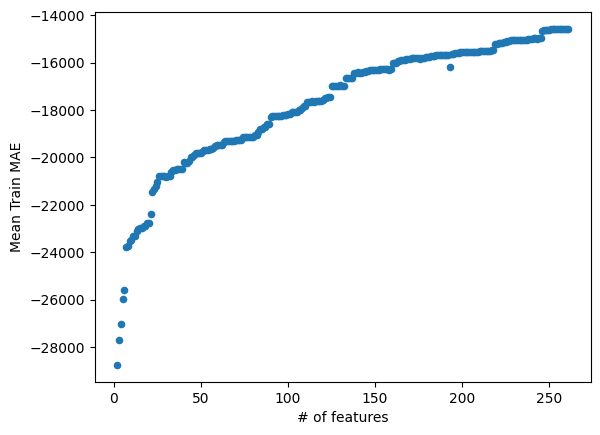

In [ ]:
hyperdf_backwards.plot.scatter(x="# of features", y="Mean Train MAE")

In [ ]:
hyperdf_backwards['Mean Test MAE'].describe()

count    2.600000e+02
mean    -5.123488e+09
std      3.289993e+10
min     -3.163252e+11
25%     -2.117377e+04
50%     -2.057498e+04
75%     -2.010795e+04
max     -1.928614e+04
Name: Mean Test MAE, dtype: float64

In [ ]:
hyperdf_backwards['Mean Test RMSE'].describe()

count    2.600000e+02
mean    -7.244117e+10
std      4.753435e+11
min     -4.447150e+12
25%     -3.527878e+04
50%     -3.452665e+04
75%     -3.407782e+04
max     -3.239839e+04
Name: Mean Test RMSE, dtype: float64

In [ ]:
# somewhat winsorizing

hyperdf_backwards.loc[hyperdf_backwards['Mean Test RMSE'] < -5e+4, 'Mean Test RMSE'] = -5e+4

In [ ]:
# somewhat winsorizing

hyperdf_backwards.loc[hyperdf_backwards['Mean Test MAE'] < -3e+4, 'Mean Test MAE'] = -3e+4

<Axes: >

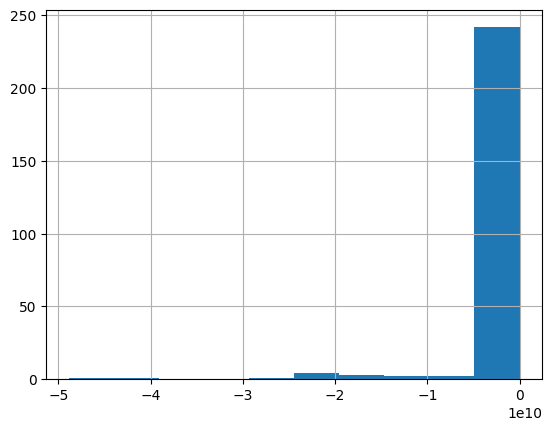

In [ ]:
hyperdf_backwards[hyperdf_backwards['Mean Test MAE'] >= -1e+11]['Mean Test MAE'].hist()

In [ ]:
hyperdf[hyperdf['Mean Test MAE'] >= -5e+12].sort_values('Mean Test MAE')

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",2,-50917.747951,718.767003,-51025.582727,2417.620883,-68771.928563,1143.656030,-68911.347574,4685.402441,Numerical features with naive approach,5,"[-51374.920052864305, -49833.777504480895, -50...","[-49139.05525895495, -54376.191779954854, -525...","[-69990.74915738498, -67730.88469327173, -6808...","[-64014.98287924205, -73129.51171339606, -7195...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",6,-40996.585533,740.505147,-41460.365088,1846.014351,-58856.158169,1293.764754,-59417.084208,5207.864307,Numerical features with smart approach,5,"[-41422.64043995177, -40287.3146661194, -40494...","[-40183.65547804687, -42768.655915726864, -427...","[-60107.86726986333, -58639.82850941593, -5768...","[-54210.8930157506, -60584.7240989845, -64172....",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",1,-33723.230159,621.789022,-33766.384852,2016.830372,-48565.462619,1107.815127,-48492.875761,4389.638769,baseline using single most correlated feature,5,"[-34117.10336130585, -33290.297298534904, -329...","[-32087.026266832185, -35617.89568102952, -361...","[-49840.22992041868, -48617.94154897005, -4685...","[-43226.91783631449, -48486.47097996885, -5510...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,-28757.658393,374.908530,-28912.795898,1365.112922,-42409.038681,1010.334546,-42586.994659,4178.400539,2 highest correlated features,5,"[-29184.44455190781, -28610.965496216086, -283...","[-27112.360859175325, -29629.550895243145, -29...","[-43716.161155878486, -42333.18113753699, -417...","[-37003.44813403181, -42963.793999464055, -456...",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,-24834.794184,400.712917,-25300.574451,1143.540203,-36741.847592,1206.177588,-37205.265481,4808.617689,all ordinal,5,"[-25208.369915157284, -24815.445125149825, -24...","[-23835.94225319929, -25532.52953048413, -2677...","[-38156.14653249388, -37105.09884631882, -3554...","[-31331.414093767857, -36013.39873996856, -421...",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",27,-24043.111760,681.348288,-25003.399745,1952.405138,-39439.527466,2211.841618,-41224.741665,8077.955909,all numerical/continuous,5,"[-24304.993374461203, -24301.630413812294, -24...","[-24943.183426942433, -24447.70999458347, -231...","[-41178.04632506182, -39723.344982177194, -402...","[-34526.219038501855, -40822.48135062879, -387...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",10,-23486.733155,434.568183,-23857.873696,1124.169708,-36525.366075,1443.893653,-37435.206619,6057.965302,top 10 features by correlation,5,"[-23926.510051139394, -23492.653993932792, -23...","[-22236.15590435126, -24521.373549107302, -237...","[-38247.294098794904, -36441.23648663021, -362...","[-29791.460367925145, -37875.09972239045, -393...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",51,-20457.725684,645.902465,-21577.979831,957.834015,-32828.851680,1766.612090,-35339.251277,7287.741358,all continuous and ordinal,5,"[-20868.521786576137, -20630.99268969516, -203...","[-21017.799085718852, -21716.91604140758, -219...","[-34608.3403496537, -32940.37976496939, -32841...","[-27621.46642685809, -35039.15781654459, -3600...",LinearRegression()


<Axes: xlabel='# of features', ylabel='Mean Test MAE'>

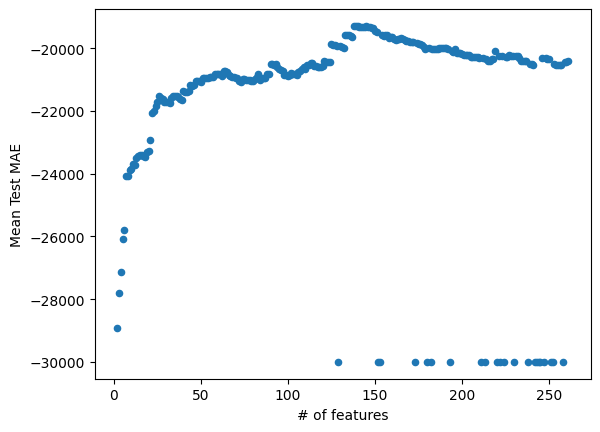

In [ ]:
hyperdf_backwards.plot.scatter(x="# of features", y="Mean Test MAE")

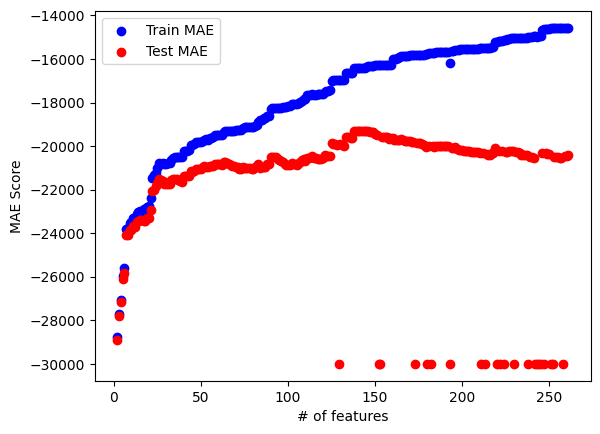

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

metric = "MAE"

# Plot the data
plt.scatter(hyperdf_backwards["# of features"],
            hyperdf_backwards["Mean Train " + metric], color="blue",
            label="Train " + metric)
plt.scatter(hyperdf_backwards["# of features"],
            hyperdf_backwards["Mean Test " + metric], color="red",
            label="Test " + metric)

plt.legend(loc=2)

# Add labels to the axes
plt.xlabel("# of features")
plt.ylabel(metric + " Score")

# Show the plot
plt.show()

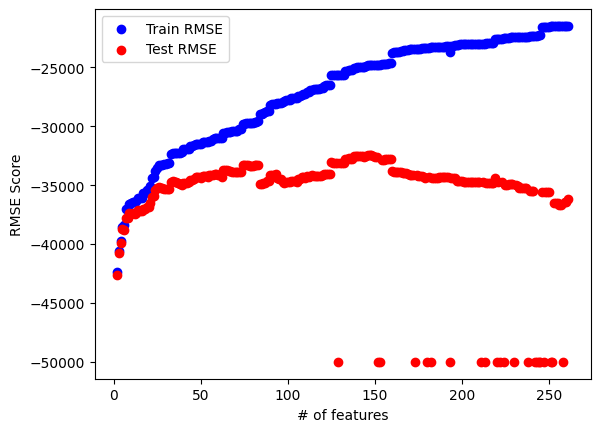

In [ ]:
metric = "RMSE"

# Plot the data
plt.scatter(hyperdf_backwards["# of features"],
            hyperdf_backwards["Mean Train " + metric], color="blue",
            label="Train " + metric)
plt.scatter(hyperdf_backwards["# of features"],
            hyperdf_backwards["Mean Test " + metric], color="red",
            label="Test " + metric)

plt.legend(loc=2)

# Add labels to the axes
plt.xlabel("# of features")
plt.ylabel(metric + " Score")

# Show the plot
plt.show()

- Seems like anywhere from 75 to 150 features will be good.

- Let's go with 75 for now

In [ ]:
# Take top 75 features
feats = sorted_cor[-75:]

# X final
Xf = X[feats].copy()

model.fit(Xf, y)

LinearRegression()

In [ ]:
# define a series which is the min/max range of each feature in Xf

mm_range = Xf.max() - Xf.min()

In [ ]:
coefs = pd.Series(model.coef_, index=Xf.columns)
coefs.sort_values()

GarageYrBlt_isna        -166673.546365
GarageType_nan          -166673.546365
Neighborhood_Edwards     -14565.550377
HouseStyle_2Story        -14263.645837
Foundation_BrkTil        -12257.224357
MSZoning_RM              -10061.087268
Neighborhood_OldTown      -9785.780824
Exterior1st_VinylSd       -8519.427256
Foundation_PConc          -7429.885788
Foundation_CBlock         -7428.796694
SaleCondition_Partial     -7098.210707
Neighborhood_NAmes        -5529.012948
Electrical_SBrkr          -4973.592594
RoofStyle_Gable           -3660.763354
CentralAir_N              -3611.601364
BsmtCond                  -2399.694369
FireplaceQu               -2319.207340
LotShape_Reg              -1678.146522
Electrical_FuseA          -1289.983517
MSZoning_RL                -760.194405
Fence_nan                  -416.146401
LotShape_IR1               -397.764283
GarageYrBlt                -194.822277
YearBuilt                  -110.177760
LotFrontage                 -18.529502
GrLivArea                

In [ ]:
# transformed weight vec

twv = coefs.abs() / mm_range

twv.sort_values(ascending=False)


GarageYrBlt_isna         166673.546365
GarageType_nan           166673.546365
RoofMatl_WdShngl          84881.432225
Neighborhood_NoRidge      50738.429555
Neighborhood_StoneBr      43471.394891
Neighborhood_NridgHt      34292.742498
FireplaceQu_Ex            28442.187657
SaleType_New              28062.408465
GarageType_BuiltIn        15222.245872
Neighborhood_Edwards      14565.550377
HouseStyle_2Story         14263.645837
GarageType_Detchd         14059.984188
GarageType_Attchd         13151.671271
Foundation_BrkTil         12257.224357
MasVnrType_None           11651.044806
Exterior2nd_VinylSd       10949.791443
MSZoning_RM               10061.087268
MasVnrType_Stone          10008.643765
Neighborhood_OldTown       9785.780824
MSSubClass_60              9693.297284
Exterior1st_VinylSd        8519.427256
Foundation_PConc           7429.885788
Foundation_CBlock          7428.796694
SaleCondition_Partial      7098.210707
FireplaceQu_Gd             6651.615654
RoofStyle_Hip            

In [ ]:
# Choose "random" indices (per our discussion last time, I think I don't need to
# randomly choose train/test splits)
# or at least we need to know what the indices are for train and test

size = int(0.8*len(y))
train_indices = npr.choice(y.index, size=size, replace=False)
train_indices

test_indices = np.array( list(set(np.array(y.index)).difference(set(train_indices))) )
test_indices

In [ ]:
# define function which outputs all info we need when testing new hyperparameters

def regress(X, y, Notes='', k=5, model=LinearRegression()):
  '''
  Fits a model on the features "X" and targets "y"
  default is a LinearRegression model

  uses cross validation

  k: number of folds for cross validation
    default is 5

  X and y are pandas DataFrames

  returns a dictionary with relevant hyperparameters and metrics
  '''

  scores = cross_validate(model, X.copy(), y.copy(), cv=k,
    scoring=('neg_root_mean_squared_error', 'neg_mean_absolute_error'),
    return_train_score=True)

  # create hyperparameter dictionary
  hypers = {'Features':X.columns, '# of features':len(X.columns), \
            'Mean Train MAE':np.mean(scores['train_neg_mean_absolute_error']), \
            'Std Train MAE':np.std(scores['train_neg_mean_absolute_error']), \

            'Mean Test MAE':np.mean(scores['test_neg_mean_absolute_error']), \
            'Std Test MAE':np.std(scores['test_neg_mean_absolute_error']), \

            'Mean Train RMSE':np.mean(scores['train_neg_root_mean_squared_error']), \
            'Std Train RMSE':np.std(scores['train_neg_root_mean_squared_error']), \

            'Mean Test RMSE':np.mean(scores['test_neg_root_mean_squared_error']), \
            'Std Test RMSE':np.std(scores['test_neg_root_mean_squared_error']), \

            "Notes":Notes,
            "Folds":k,

            'Train MAE': scores['train_neg_mean_absolute_error'], \
            'Test MAE': scores['test_neg_mean_absolute_error'], \
            'Train RMSE': scores['train_neg_root_mean_squared_error'], \
            'Test RMSE': scores['test_neg_root_mean_squared_error'], \
            'Model Type':model}

  return hypers

## Potential NLP stuff